In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# S&P500 data pull

In [92]:
# Get the data for the stock AAPL
Sp_data = yf.download('^VIX','2011-01-01','2023-06-10')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [93]:
Sp_data.reset_index(inplace=True)
Sp_data['Date'] = pd.to_datetime(Sp_data['Date'])
Sp_data.columns = ['Date','S&P500']

C:\Users\vamsh\AppData\Local\Temp\ipykernel_24316\2792102629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sp_data['Date'] = pd.to_datetime(Sp_data['Date'])


In [94]:
Sp_data.head()

,Date,S&P500
0,2011-01-03,17.610001
1,2011-01-04,17.379999
2,2011-01-05,17.020000
3,2011-01-06,17.400000
4,2011-01-07,17.139999


## Fear Index data

In [95]:
Fear_data = pd.read_csv(r'C:\Users\vamsh\OneDrive\Desktop\Trading_Bot_version_1\Data\complete_data_fearindex.csv',index_col=0)
Fear_data.columns = ['Date','Fear_index']
Fear_data['Date'] = pd.to_datetime(Fear_data['Date'])

In [96]:
Fear_data.head()

,Date,Fear_index
0,2011-01-03,68.0
1,2011-01-04,68.0
2,2011-01-05,67.0
3,2011-01-06,64.0
4,2011-01-07,63.0


In [97]:
Complete_df = pd.merge(Fear_data, Sp_data, on='Date', how='left')
Complete_df.dropna(inplace=True)

In [98]:
Complete_df.head()

,Date,Fear_index,S&P500
0,2011-01-03,68.0,17.610001
1,2011-01-04,68.0,17.379999
2,2011-01-05,67.0,17.020000
3,2011-01-06,64.0,17.400000
4,2011-01-07,63.0,17.139999


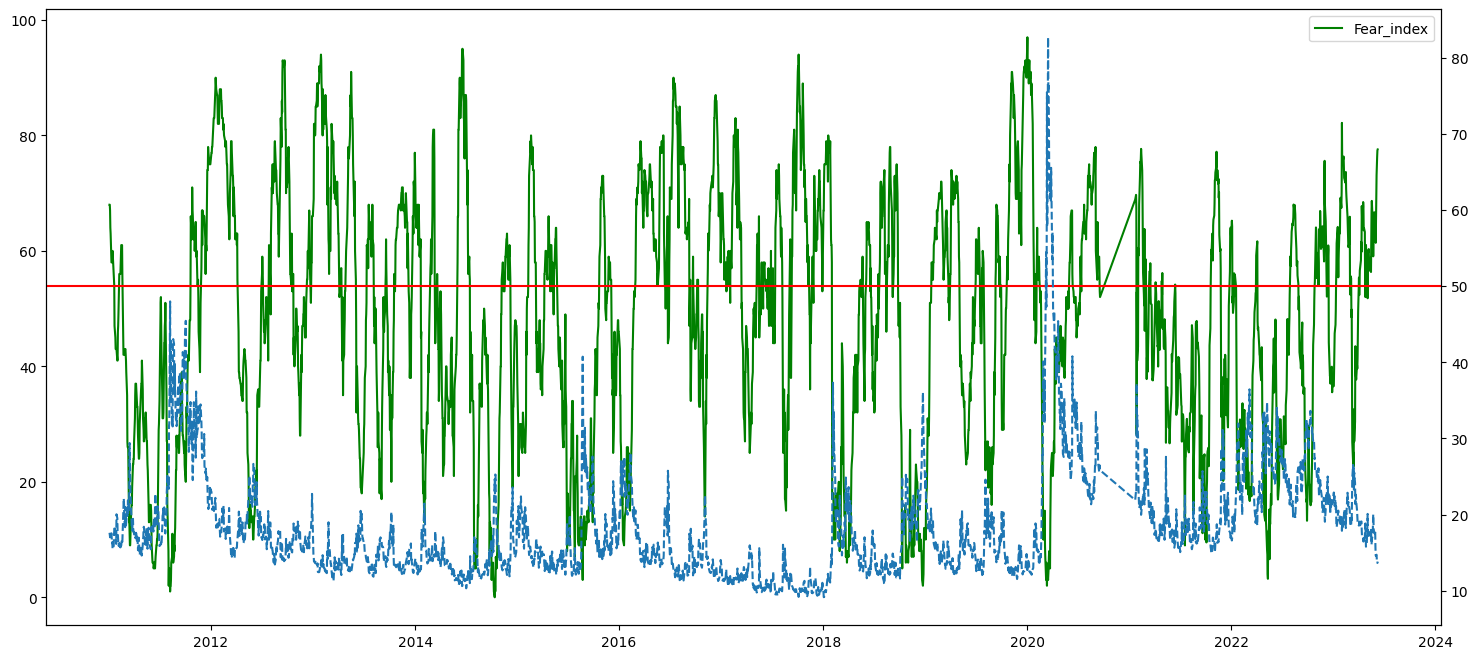

In [99]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(Complete_df['Date'], Complete_df['Fear_index'],'-', label = 'Fear_index',color='green')
plt.axhline(y=50, color='r', linestyle='-')
ax2.plot(Complete_df['Date'], Complete_df['S&P500'], '--', label = 'S&P 500')

ax.legend(loc=0)

plt.show()

In [100]:
def fear_category(x):
    if x <= 25:
        return "Extreme fear"
    elif (x <= 50) and (x > 25):
        return "Fear"
    elif (x <= 65) and (x > 50):
        return "Greed"
    else:
        return "Extreme Greed"

In [101]:
Complete_df['Fear_category'] = Complete_df['Fear_index'].apply(lambda x: fear_category(x))

In [102]:
Complete_df[['Fear_index','S&P500']].corr()

,Fear_index,S&P500
Fear_index,1.000000,-0.447925
S&P500,-0.447925,1.000000


In [103]:
Complete_df['Price_diff'] = Complete_df['S&P500'].diff()

In [104]:
Complete_df.drop(index=0,inplace=True)

In [105]:
Complete_df['Market_Direction'] = (Complete_df['Price_diff']>0).astype(int)

In [106]:
Complete_df[Complete_df['Fear_category'].isin(['Fear', 'Extreme fear'])]

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction
13,2011-01-21,47.000000,18.469999,Fear,0.480000,1
14,2011-01-24,45.000000,17.650000,Fear,-0.820000,0
15,2011-01-25,43.000000,17.590000,Fear,-0.059999,0
16,2011-01-26,43.000000,16.639999,Fear,-0.950001,0
17,2011-01-27,43.000000,16.150000,Fear,-0.490000,0
...,...,...,...,...,...,...
3239,2023-03-27,40.200000,20.600000,Fear,-1.139999,0
3240,2023-03-28,39.600000,19.969999,Fear,-0.630001,0
3241,2023-03-29,41.457143,19.120001,Fear,-0.849998,0
3242,2023-03-30,45.228571,19.020000,Fear,-0.100000,0


In [107]:
Complete_df ['Year'] = Complete_df['Date'].dt.year
Complete_df ['Month'] = Complete_df['Date'].dt.month

In [108]:
Complete_df

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction,Year,Month
1,2011-01-04,68.000000,17.379999,Extreme Greed,-0.230001,0,2011,1
2,2011-01-05,67.000000,17.020000,Extreme Greed,-0.359999,0,2011,1
3,2011-01-06,64.000000,17.400000,Greed,0.379999,1,2011,1
4,2011-01-07,63.000000,17.139999,Greed,-0.260000,0,2011,1
5,2011-01-10,58.000000,17.540001,Greed,0.400002,1,2011,1
...,...,...,...,...,...,...,...,...
3309,2023-06-05,73.114286,14.730000,Extreme Greed,0.129999,1,2023,6
3310,2023-06-06,75.057143,13.960000,Extreme Greed,-0.770000,0,2023,6
3311,2023-06-07,76.228571,13.940000,Extreme Greed,-0.020000,0,2023,6
3312,2023-06-08,77.400000,13.650000,Extreme Greed,-0.290000,0,2023,6


In [109]:
Complete_df[['Fear_category','Year',]].groupby(['Year','Fear_category']).size()

Year  Fear_category
2011  Extreme Greed     21
      Extreme fear      75
      Fear             105
      Greed             50
2012  Extreme Greed    102
      Extreme fear      23
      Fear              73
      Greed             52
2013  Extreme Greed     99
      Extreme fear      18
      Fear              66
      Greed             69
2014  Extreme Greed     37
      Extreme fear      56
      Fear             110
      Greed             49
2015  Extreme Greed     25
      Extreme fear      66
      Fear             103
      Greed             58
2016  Extreme Greed    118
      Extreme fear      25
      Fear              53
      Greed             56
2017  Extreme Greed     82
      Extreme fear       8
      Fear              70
      Greed             91
2018  Extreme Greed     44
      Extreme fear     101
      Fear              53
      Greed             53
2019  Extreme Greed     77
      Extreme fear      27
      Fear              72
      Greed             76
2020  Ex

In [110]:
Complete_df[['Fear_category','Month']].groupby(['Fear_category','Month']).size()

Fear_category  Month
Extreme Greed  1         94
               2         90
               3         71
               4         44
               5         30
               6         37
               7         42
               8         77
               9         48
               10        42
               11        76
               12        72
Extreme fear   1         31
               2         37
               3         65
               4         26
               5         46
               6         46
               7         28
               8         84
               9         52
               10        59
               11        25
               12        26
Fear           1         55
               2         53
               3         90
               4        132
               5        120
               6        117
               7        103
               8         62
               9         91
               10        91
               11        43

In [111]:
Complete_df["cumsum"] =(Complete_df['Fear_category'] != Complete_df['Fear_category'].shift()).cumsum()

In [112]:
Complete_df

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction,Year,Month,cumsum
1,2011-01-04,68.000000,17.379999,Extreme Greed,-0.230001,0,2011,1,1
2,2011-01-05,67.000000,17.020000,Extreme Greed,-0.359999,0,2011,1,1
3,2011-01-06,64.000000,17.400000,Greed,0.379999,1,2011,1,2
4,2011-01-07,63.000000,17.139999,Greed,-0.260000,0,2011,1,2
5,2011-01-10,58.000000,17.540001,Greed,0.400002,1,2011,1,2
...,...,...,...,...,...,...,...,...,...
3309,2023-06-05,73.114286,14.730000,Extreme Greed,0.129999,1,2023,6,446
3310,2023-06-06,75.057143,13.960000,Extreme Greed,-0.770000,0,2023,6,446
3311,2023-06-07,76.228571,13.940000,Extreme Greed,-0.020000,0,2023,6,446
3312,2023-06-08,77.400000,13.650000,Extreme Greed,-0.290000,0,2023,6,446


In [113]:
Complete_df['Fear_category'].unique()

array(['Extreme Greed', 'Greed', 'Fear', 'Extreme fear'], dtype=object)

## EXTREME FEARS START AND END DATES ## WronG ON s&P500 GET FIRST DAY PRICE AND LAST DAY PRICE

## Avg return calculation of Fear and extreme fear

In [114]:
def Fear_stock_price(df, fear_category):

    Fear_stock_price = df[df['Fear_category'].isin(fear_category)][['Date','cumsum','S&P500']].groupby('cumsum').agg({"Date": ["min", "max"], "S&P500": ['first', 'last']}).reset_index()
    Fear_stock_price.columns = Fear_stock_price.columns.map("_".join)
    Fear_stock_price['No_of_days']  = Fear_stock_price['Date_max'] - Fear_stock_price['Date_min']
    Fear_stock_price['S&P500_price'] = Fear_stock_price['S&P500_last'] - Fear_stock_price['S&P500_first']

    Fear_stock_price['Return_on_investment'] = ((Fear_stock_price['S&P500_last']-Fear_stock_price['S&P500_first'])/Fear_stock_price['S&P500_first'] *100)

    Fear_stock_price['Year'] = Fear_stock_price['Date_min'].dt.year
    Fear_stock_price.drop(Fear_stock_price[Fear_stock_price['No_of_days'] == '0 days'].index, inplace=True)
    Fear_stock_price.drop(Fear_stock_price[Fear_stock_price['No_of_days'] == '1 days'].index, inplace=True)
    Fear_stock_price.drop(Fear_stock_price[Fear_stock_price['No_of_days'] == '2 days'].index, inplace=True)
    Fear_stock_price.drop(Fear_stock_price[Fear_stock_price['No_of_days'] == '3 days'].index, inplace=True)
    # Fear_stock_price.drop(Fear_stock_price[Fear_stock_price['No_of_days'].isin['0 days','1 days','2 days','3 days']].index, inplace=True)
    Fear_stock_price.drop(columns=['cumsum_'], inplace=True)

    return Fear_stock_price

    


<Axes: >

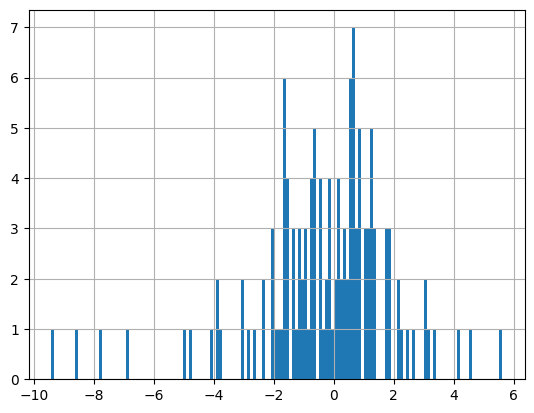

In [115]:
Fear_stock_price(Complete_df, ['Greed','Extreme Greed'])['S&P500_price'].hist(bins=150)

In [116]:
Fear_stock_price(Complete_df, ['Extreme Greed'])

,Date_min,Date_max,S&P500_first,S&P500_last,No_of_days,S&P500_price,Return_on_investment,Year
4,2011-12-02,2011-12-08,27.520000,30.590000,6 days,3.070000,11.155522,2011
5,2011-12-19,2012-03-05,24.920000,18.049999,77 days,-6.870001,-27.568222,2011
6,2012-03-09,2012-03-27,17.110001,15.590000,18 days,-1.520000,-8.883696,2012
7,2012-08-06,2012-08-28,15.950000,16.490000,22 days,0.540000,3.385580,2012
8,2012-09-04,2012-10-09,17.980000,16.370001,35 days,-1.609999,-8.954387,2012
10,2012-12-28,2013-02-22,22.719999,14.170000,56 days,-8.549999,-37.632040,2012
11,2013-03-05,2013-03-28,13.480000,12.700000,23 days,-0.780000,-5.786348,2013
12,2013-05-06,2013-05-30,12.660000,14.530000,24 days,1.870000,14.770931,2013
15,2013-10-31,2013-11-25,13.750000,12.790000,25 days,-0.960000,-6.981818,2013
16,2013-11-27,2013-12-02,12.980000,14.230000,5 days,1.250000,9.630201,2013


In [89]:
Fear_stock_price(Complete_df, ['Extreme fear','Fear'])['No_of_days'].describe()

count                           126
mean     14 days 12:11:25.714285714
std      11 days 02:04:23.680131095
min                 4 days 00:00:00
25%                 6 days 00:00:00
50%                10 days 12:00:00
75%                20 days 00:00:00
max                60 days 00:00:00
Name: No_of_days, dtype: object

## Total Return in Fear and Xtreme fear markets by year and avg days per year

In [60]:
Fear_stock_price(Complete_df, ['Extreme fear','Fear'])[['Year','S&P500_price','No_of_days','Return_on_investment']].groupby(['Year']).agg({'S&P500_price':'sum','Return_on_investment':'sum','No_of_days':['mean','min','max']}).reset_index()

Year S&P500_price Return_on_investment                 No_of_days         \
                  sum                  sum                       mean    min   
0   2011    12.839996            76.534883 20 days 22:09:13.846153846 5 days   
1   2012     5.110000            32.665905           29 days 20:00:00 5 days   
2   2013    -1.599998             8.823897           14 days 07:12:00 8 days   
3   2014     0.539997             9.438331 18 days 08:34:17.142857142 4 days   
4   2015    -1.730000            11.702166 19 days 15:25:42.857142857 5 days   
5   2016   -16.860002           -72.530508           12 days 19:12:00 4 days   
6   2017   -12.630000           -81.826477           21 days 15:00:00 6 days   
7   2018     4.689998            29.506080           26 days 12:00:00 5 days   
8   2019    -5.009996           -19.045315           14 days 06:00:00 4 days   
9   2020    -6.880000            31.625280 23 days 13:42:51.428571428 5 days   
10  2021   -17.229998           -48.954724           24 days 16:48:00 4 days   
11  2022     6.879997            53.981037           14 days 02:24:00 4 days   
12  2023     2.580000            17.593352           11 days 00:00:00 4 days   

             
        max  
0   40 days  
1   57 days  
2   26 days  
3   37 days  
4   47 days  
5   52 days  
6   57 days  
7   60 days  
8   34 days  
9   56 days  
10 141 days  
11  29 days  
12  25 days

In [61]:
Fear_stock_price(Complete_df, ['Greed','Extreme Greed'])[['Year','S&P500_price','No_of_days','Return_on_investment']].groupby(['Year']).agg({'S&P500_price':'sum','Return_on_investment':'sum','No_of_days':['mean','min','max']}).reset_index()

Year S&P500_price Return_on_investment                No_of_days          \
                  sum                  sum                      mean     min   
0   2011    -5.789999           -18.838759          13 days 00:00:00 13 days   
1   2012   -12.359999           -45.765732          16 days 15:00:00  4 days   
2   2013    -0.900001            -6.953030          16 days 00:00:00  6 days   
3   2014    -2.150001           -17.038957          16 days 00:00:00  6 days   
4   2015     0.230000             2.435243           9 days 08:00:00  6 days   
5   2016    -5.920001           -35.030188          14 days 00:00:00  4 days   
6   2017     2.300000            27.084240 9 days 01:50:46.153846153  5 days   
7   2018    -0.180000            -1.391475          10 days 04:00:00  6 days   
8   2019    -0.439999            -0.223324          16 days 18:40:00  6 days   
9   2020    -4.490000           -14.353023          24 days 12:00:00  6 days   
10  2021    -0.180002            -1.163941           7 days 00:00:00  4 days   
11  2022     1.929998            11.867956          12 days 16:00:00  4 days   
12  2023    -1.320000            -5.618386 9 days 13:42:51.428571428  4 days   

            
       max  
0  13 days  
1  52 days  
2  47 days  
3  28 days  
4  16 days  
5  42 days  
6  19 days  
7  16 days  
8  36 days  
9  43 days  
10 11 days  
11 19 days  
12 21 days